In [23]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
import missingno


In [24]:
resultados = pd.read_csv('Results21.csv', delimiter=';')
quali = pd.read_csv('qualifying21.csv', delimiter=';')
pits = pd.read_csv('pitstops21.csv', delimiter=';')
laptimes = pd.read_csv('laptimes21.csv', delimiter=';')

In [25]:
columnas = ['raceId', 'driverId']
archivo1 = pd.merge(resultados, laptimes, on=columnas)
archivo2 = pd.merge(archivo1, quali, on=columnas)
ds = pd.merge(archivo2, pits, on=columnas)

In [26]:
ds.sample(5)

,resultId,raceId,driverId,constructorId_x,Name,date,number_x,grid,position_x,positionText,positionOrder,points,PointsAfterRace,laps,time_x,milliseconds_x,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,lap_x,position_y,time_y,milliseconds_y,qualifyId,constructorId_y,number_y,position,q1,q2,q3,stop,lap_y,time,duration,milliseconds
21507,25137,1060,852,213,Austria,4/7/2021,22,7,12,12,12,0,NaN,70,\N,\N,54,9,1:08.455,227.080,11,22,15,1:10.551,70551,8900,213,22,7,1:04.967,1:04.518,1:04.273,1,12,15:18:55,21145.0,21145
25794,25170,1062,842,213,Hungary,1/8/2021,10,5,5,5,5,11,NaN,70,+1:03.614,7546813,70,1,1:18.394,201.183,1,19,10,1:24.401,84401,8938,213,10,5,1:16.874,1:16.394,1:16.483,1,2,15:08:25,NaN,1457615
45601,25380,1072,8,51,Saudi arabia,5/12/2021,7,12,15,15,15,0,NaN,49,\N,\N,45,13,1:32.778,239.565,11,5,14,1:36.009,96009,9147,51,7,12,1:28.856,1:28.885,\N,1,13,20:58:54,NaN,1008569
32309,25258,1066,842,213,Russia,26/9/2021,10,11,13,13,13,0,NaN,52,\N,\N,35,4,1:38.279,214.214,11,42,15,1:40.987,100987,9025,213,10,12,1:47.828,1:46.641,\N,1,33,16:00:00,29354.0,29354
17597,25082,1057,847,3,Azerbaijan,6/6/2021,63,15,\N,R,17,0,NaN,48,\N,\N,43,15,1:45.959,203.954,6,21,16,1:47.524,107524,8848,3,63,15,1:42.728,1:42.758,\N,4,48,17:37:18,NaN,2036172


In [27]:
ds.head(5)

,resultId,raceId,driverId,constructorId_x,Name,date,number_x,grid,position_x,positionText,positionOrder,points,PointsAfterRace,laps,time_x,milliseconds_x,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,lap_x,position_y,time_y,milliseconds_y,qualifyId,constructorId_y,number_y,position,q1,q2,q3,stop,lap_y,time,duration,milliseconds
0,24966,1052,1,131,Bahrain,28/3/2021,44,2,1,1,1,25,25,56,1:32:03.897,5523897,44,4,1:34.015,207.235,1,1,2,1:59.538,119538,8736,131,44,2,1:30.617,1:30.085,1:29.385,1,13,18:30:29,24839.0,24839
1,24966,1052,1,131,Bahrain,28/3/2021,44,2,1,1,1,25,25,56,1:32:03.897,5523897,44,4,1:34.015,207.235,1,1,2,1:59.538,119538,8736,131,44,2,1:30.617,1:30.085,1:29.385,2,28,18:54:40,24076.0,24076
2,24966,1052,1,131,Bahrain,28/3/2021,44,2,1,1,1,25,25,56,1:32:03.897,5523897,44,4,1:34.015,207.235,1,2,2,2:22.712,142712,8736,131,44,2,1:30.617,1:30.085,1:29.385,1,13,18:30:29,24839.0,24839
3,24966,1052,1,131,Bahrain,28/3/2021,44,2,1,1,1,25,25,56,1:32:03.897,5523897,44,4,1:34.015,207.235,1,2,2,2:22.712,142712,8736,131,44,2,1:30.617,1:30.085,1:29.385,2,28,18:54:40,24076.0,24076
4,24966,1052,1,131,Bahrain,28/3/2021,44,2,1,1,1,25,25,56,1:32:03.897,5523897,44,4,1:34.015,207.235,1,3,2,2:36.656,156656,8736,131,44,2,1:30.617,1:30.085,1:29.385,1,13,18:30:29,24839.0,24839


In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47495 entries, 0 to 47494
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         47495 non-null  int64  
 1   raceId           47495 non-null  int64  
 2   driverId         47495 non-null  int64  
 3   constructorId_x  47495 non-null  int64  
 4   Name             47495 non-null  object 
 5   date             47495 non-null  object 
 6   number_x         47495 non-null  int64  
 7   grid             47495 non-null  int64  
 8   position_x       47495 non-null  object 
 9   positionText     47495 non-null  object 
 10  positionOrder    47495 non-null  int64  
 11  points           47495 non-null  object 
 12  PointsAfterRace  11970 non-null  object 
 13  laps             47495 non-null  int64  
 14  time_x           47495 non-null  object 
 15  milliseconds_x   47495 non-null  object 
 16  fastestLap       47495 non-null  object 
 17  rank        

Eliminamos columnas repetidas, esto se debe al haber a juntado distintas bases:

In [29]:
columnas_eliminadas = ['number_y', 'constructorId_y', 'position', 'positionText', 'positionOrder']
ds=ds.drop(columnas_eliminadas, axis=1)

Cambiamos nombres de columnas para facilitar uso y entendimiento:

In [30]:
nuevas_columnas = {'number_x': 'driver_number', 'position_x': 'position_final', 'laps': 'total_laps', 'time_x': 'total_time', 'milliseconds_x': 'milliseconds_total', 'lap_x': 'lap', 'position_y': 'position_lap', 'time_y': 'time_lap', 'milliseconds_y': 'milliseconds_lap', 'lap_y': 'lap_stop'}
ds.rename(columns=nuevas_columnas, inplace=True)

Cambiamos el valor de position_final \N que significa que no termino a posicion 21

In [31]:
ds.loc[ds['position_final'] == '\\N', 'position_final'] = 21

Se debe modificar los siguientes tipos de datos:

In [32]:
ds = ds.astype({'position_final':'int'})

In [33]:
ds['PointsAfterRace'] = ds['PointsAfterRace'].str.replace(',', '.').astype('float')
#Se remplazan las comas por puntos y luego se tranforma a tipo float

In [34]:
def tiempo_a_segundos(tiempo):
    minutos, segundos = tiempo.split(':')
    return int(minutos) * 60 + float(segundos)

ds['time_lap'] = ds['time_lap'].apply(tiempo_a_segundos).astype(float)

#La función tiempo_a_segundos toma un tiempo 
# en formato 'minutos:segundos.milisegundos', 
# divide los minutos y los segundos, los convierte a segundos 
# y devuelve el tiempo total en segundos como un número flotante.

In [35]:
ds['date'] = pd.to_datetime(ds['date'], format='%d/%m/%Y')

In [36]:
ds.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
resultId,47495.0,NaN,NaN,NaN,25176.555658,24966.0,25044.0,25168.0,25316.0,25404.0,135.143186
raceId,47495.0,NaN,NaN,NaN,1061.57286,1051.0,1055.0,1061.0,1069.0,1073.0,7.067615
driverId,47495.0,NaN,NaN,NaN,662.086135,1.0,815.0,839.0,846.0,854.0,340.078077
constructorId_x,47495.0,NaN,NaN,NaN,95.478893,1.0,6.0,117.0,210.0,214.0,87.324258
Name,47495,21,Brazil,5415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,47495,NaN,NaN,NaN,2021-08-06 09:51:55.047899648,2021-03-28 00:00:00,2021-05-09 00:00:00,2021-08-01 00:00:00,2021-11-07 00:00:00,2021-12-12 00:00:00,NaN
driver_number,47495.0,NaN,NaN,NaN,29.624992,3.0,9.0,18.0,47.0,99.0,27.352923
grid,47495.0,NaN,NaN,NaN,9.723824,0.0,5.0,9.0,15.0,20.0,5.955861
position_final,47495.0,NaN,NaN,NaN,9.835646,1.0,5.0,10.0,14.0,21.0,5.592334
points,47495,19,0,21897,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ds.sample(21)

,resultId,raceId,driverId,constructorId_x,Name,date,driver_number,grid,position_final,points,PointsAfterRace,total_laps,total_time,milliseconds_total,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,lap,position_lap,time_lap,milliseconds_lap,qualifyId,q1,q2,q3,stop,lap_stop,time,duration,milliseconds
8344,25012,1054,839,214,Portugal,2021-05-02,31,6,7,6,NaN,66,+1:03.749,5735170,34,8,1:21.886,204.562,1,14,8,83.874,83874,8780,1:19.092,1:18.586,1:19.042,3,22,15:37:35,27033.0,27033
38998,25329,1071,815,9,Brazil,2021-11-14,11,4,4,13,NaN,71,+39.940,5582791,71,1,1:11.010,218.453,1,21,3,74.972,74972,9099,1:09.172,1:08.973,1:08.483,1,7,14:12:34,18308.0,18308
9493,25018,1054,20,117,Portugal,2021-05-02,5,10,13,0,NaN,65,\N,\N,60,15,1:22.416,203.246,11,2,10,115.328,115328,8784,1:19.403,1:18.970,1:19.659,3,22,15:37:40,26620.0,26620
45027,25376,1072,840,117,Saudi arabia,2021-12-05,18,18,11,0,NaN,50,+1:17.212,7652330,45,14,1:32.804,239.498,1,28,10,95.382,95382,9153,1:29.368,\N,\N,1,9,20:48:30,27165.0,27165
47120,25399,1073,854,210,Abu Dhabi,2021-12-12,47,19,14,0,NaN,57,\N,\N,42,17,1:29.457,212.522,11,7,18,91.681,91681,9174,1:24.906,\N,\N,1,10,17:18:55,22124.0,22124
24161,25161,1061,815,9,Great Britain,2021-07-18,11,0,16,0,NaN,51,\N,\N,50,1,1:28.617,239.317,11,47,10,90.958,90958,8918,1:27.121,1:27.073,1:26.844,4,48,16:56:54,29082.0,29082
35456,25297,1069,840,117,USA,2021-10-24,18,13,12,0,NaN,55,\N,\N,36,14,1:41.189,196.135,11,52,13,102.893,102893,9071,1:35.983,\N,\N,2,34,15:03:12,23455.0,23455
34430,25288,1069,815,9,USA,2021-10-24,11,3,3,15,NaN,56,+42.223,5718775,32,4,1:39.566,199.333,1,40,3,100.563,100563,9058,1:34.369,1:34.178,1:33.134,2,30,14:55:02,23604.0,23604
29464,25221,1064,849,3,Netherlands,2021-09-05,6,0,16,0,NaN,70,\N,\N,25,18,1:15.790,202.301,12,17,16,77.723,77723,8987,1:10.093,1:11.161,\N,1,23,15:33:19,20646.0,20646
15001,25066,1057,815,9,Azerbaijan,2021-06-06,11,6,1,25,NaN,51,2:13:36.410,8016410,45,2,1:44.687,206.432,1,30,2,106.023,106023,8840,1:41.968,1:41.630,1:41.917,2,47,17:33:39,15277.0,15277


In [38]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47495 entries, 0 to 47494
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   resultId            47495 non-null  int64         
 1   raceId              47495 non-null  int64         
 2   driverId            47495 non-null  int64         
 3   constructorId_x     47495 non-null  int64         
 4   Name                47495 non-null  object        
 5   date                47495 non-null  datetime64[ns]
 6   driver_number       47495 non-null  int64         
 7   grid                47495 non-null  int64         
 8   position_final      47495 non-null  int32         
 9   points              47495 non-null  object        
 10  PointsAfterRace     11970 non-null  float64       
 11  total_laps          47495 non-null  int64         
 12  total_time          47495 non-null  object        
 13  milliseconds_total  47495 non-null  object    

Declaramos variables para utilizar en los graficos

In [39]:
datos_corredor1 = ds[ds['driver_number'] == 44]
datos_corredor2 = ds[ds['driver_number'] == 33]


Grafico para ananlizar el campeonato luego de cada carrera


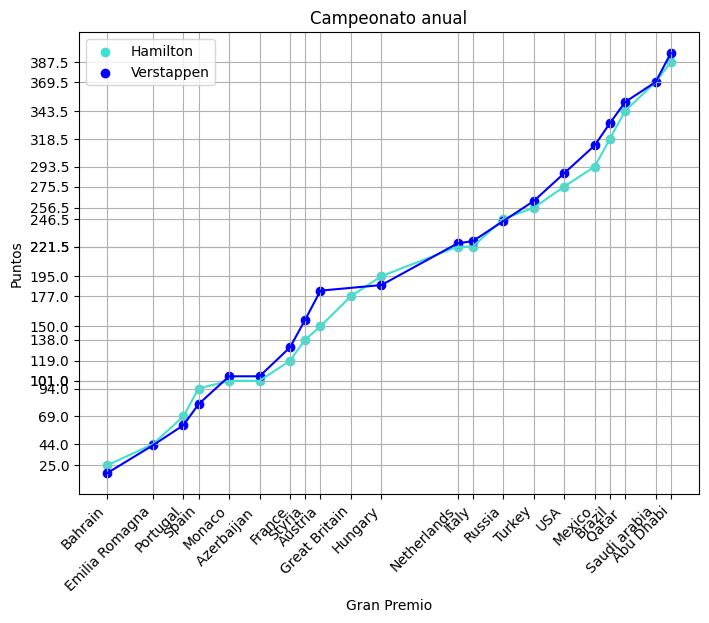

In [40]:
Ptos_tot_1 = datos_corredor1.drop_duplicates(subset=['date','PointsAfterRace','Name'])
Ptos_tot_2 = datos_corredor2.drop_duplicates(subset=['date','PointsAfterRace','Name'])

Ptos_tot_1 = Ptos_tot_1.sort_values(by='date', ascending=True)
Ptos_tot_2 = Ptos_tot_2.sort_values(by='date', ascending=True)

plt.figure(figsize=(8, 6))

plt.scatter(Ptos_tot_1['date'], Ptos_tot_1['PointsAfterRace'],color='turquoise', label='Hamilton')
plt.scatter(Ptos_tot_2['date'], Ptos_tot_2['PointsAfterRace'], color='blue', label='Verstappen')

plt.plot(Ptos_tot_1['date'], Ptos_tot_1['PointsAfterRace'], linestyle='-', color='turquoise')
plt.plot(Ptos_tot_2['date'], Ptos_tot_2['PointsAfterRace'], linestyle='-', color='blue')

plt.ylabel('Puntos')
plt.xlabel('Gran Premio')
plt.legend()

#plt.gca().invert_yaxis()
plt.title('Campeonato anual')
plt.xticks(Ptos_tot_1['date'].unique(),  rotation=45, ha='right')
plt.xticks(Ptos_tot_1['date'].unique(), Ptos_tot_1['Name'])

plt.yticks(Ptos_tot_1['PointsAfterRace'])

plt.grid(True)

plt.show()

Luego analizamos los resultados de cada carrera

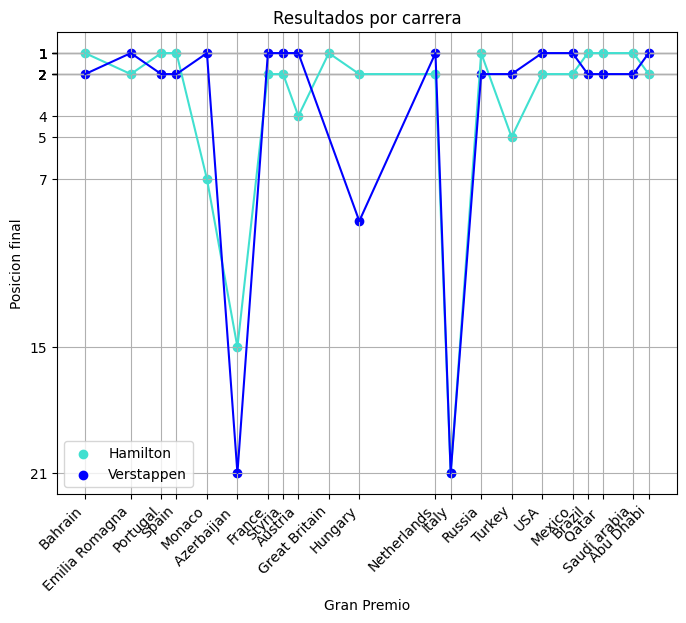

In [41]:
posiciones_finales_unicas1 = datos_corredor1.drop_duplicates(subset=['raceId','position_final','date','Name'])
posiciones_finales_unicas2 = datos_corredor2.drop_duplicates(subset=['raceId','position_final','date','Name'])

posiciones_finales_unicas1 = posiciones_finales_unicas1.sort_values(by=['date'], ascending=True)
posiciones_finales_unicas2 = posiciones_finales_unicas2.sort_values(by=['date'], ascending=True)

plt.figure(figsize=(8, 6))
plt.scatter(posiciones_finales_unicas1['date'], posiciones_finales_unicas1['position_final'],color='turquoise', label='Hamilton')
plt.scatter(posiciones_finales_unicas2['date'], posiciones_finales_unicas2['position_final'], color='blue', label='Verstappen')
plt.plot(posiciones_finales_unicas1['date'], posiciones_finales_unicas1['position_final'], linestyle='-', color='turquoise')
plt.plot(posiciones_finales_unicas2['date'], posiciones_finales_unicas2['position_final'], linestyle='-', color='blue')

plt.ylabel('Posicion final')
plt.xlabel('Gran Premio')
plt.legend()

plt.gca().invert_yaxis()

plt.xticks(posiciones_finales_unicas1['date'].unique(),  rotation=45, ha='right')
plt.xticks(posiciones_finales_unicas1['date'].unique(), posiciones_finales_unicas1['Name'].unique())
plt.yticks(posiciones_finales_unicas1['position_final'])
plt.title('Resultados por carrera')
plt.grid(True)

plt.show()

Ahora vamos a analizar y comparar la posición de clasificación con la posición al final de la carrera. 

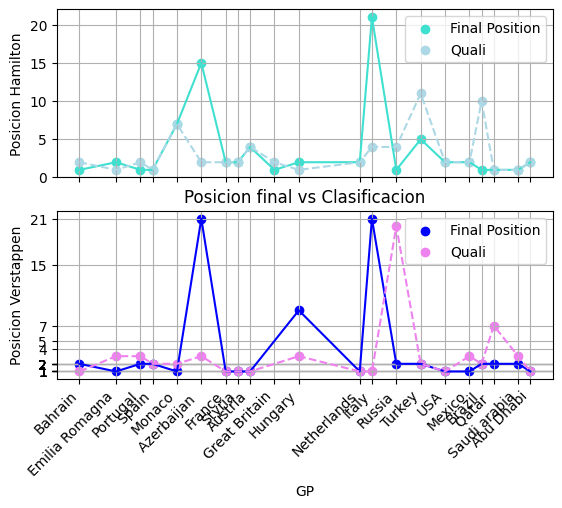

In [42]:
quali_1 = datos_corredor1.drop_duplicates(subset=['date','grid', 'position_final'])
quali_2 = datos_corredor2.drop_duplicates(subset=['date','grid', 'position_final'])

quali_1 = quali_1.sort_values(by='date', ascending=True)
quali_2 = quali_2.sort_values(by='date', ascending=True)

#Creo una figura y dos subgraficos (1 fila y dos columnas)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

#Grafico en el primer subgrafico

ax1.scatter(quali_1['date'], quali_1['position_final'],color='turquoise', label='Final Position')
ax1.scatter(quali_1['date'], quali_1['grid'], color='lightblue', label='Quali')
ax1.plot(quali_1['date'], quali_1['position_final'], linestyle='-', color='turquoise')
ax1.plot(quali_1['date'], quali_1['grid'], linestyle='--', color='lightblue')

#Grafico en el primer subgrafico

ax2.scatter(quali_2['date'], quali_2['position_final'],color='blue', label='Final Position')
ax2.scatter(quali_2['date'], quali_2['grid'], color='violet', label='Quali')
ax2.plot(quali_2['date'], quali_2['position_final'], linestyle='-', color='blue')
ax2.plot(quali_2['date'], quali_2['grid'], linestyle='--', color='violet')

ax1.set_ylabel('Posicion Hamilton')
ax2.set_ylabel('Posicion Verstappen')
plt.xlabel('GP')
ax1.legend()
ax2.legend()

plt.xticks(ds['date'].unique(),  rotation=45, ha='right')
plt.xticks(quali_1['date'].unique(),quali_1['Name'].unique())

plt.yticks(quali_1['position_final'])

ax1.grid(True)
ax2.grid(True)

plt.title('Posicion final vs Clasificacion')
plt.show()

Realizaremos un grafico de barras, que muestre la cantidad de veces que mejoró, mantuvo y empeoró la posición respecto de partida

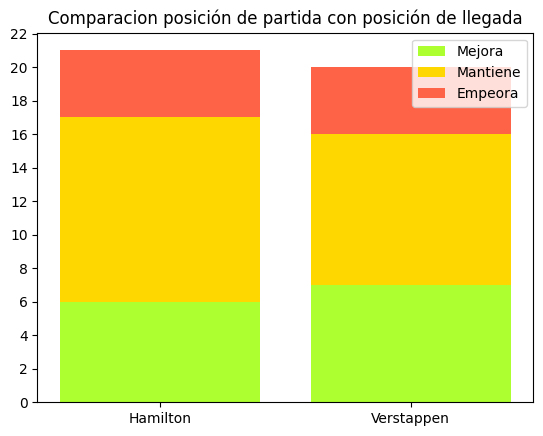

In [43]:
#Genero los datos para el corredor 1 (Hamilton)

mejora_1 = 0
empeora_1 = 0
mantiene_1 = 0

for i in quali_1.index:
    if quali_1['position_final'][i] < quali_1['grid'][i]:
        mejora_1 += 1
    elif quali_1['position_final'][i] > quali_1['grid'][i]:
        empeora_1 += 1
    else:
        mantiene_1 += 1

#Genero los datos para el corredor 2 (Verstappen)

mejora_2 = 0
empeora_2 = 0
mantiene_2 = 0

for i in quali_2.index:
    if quali_2['position_final'][i] < quali_2['grid'][i]:
        mejora_2 += 1
    elif quali_2['position_final'][i] > quali_2['grid'][i]:
        empeora_2 += 1
    else:
        mantiene_2 += 1

#Generamos el grafico de barras con los datos obtenidos

corredores = ['Hamilton', 'Verstappen']
valores1 = [mejora_1, mejora_2]
valores2 = [mantiene_1, mantiene_2]
valores3 = [empeora_1, empeora_2]


plt.bar(corredores, valores1, color='greenyellow', label='Mejora')
plt.bar(corredores, valores2, bottom=valores1, color='gold', label='Mantiene')
plt.bar(corredores, valores3, bottom=np.array(valores1)+np.array(valores2), color='tomato', label='Empeora')

plt.legend()


intervalos = np.arange(0,23,2)
plt.yticks(intervalos)

plt.title('Comparacion posición de partida con posición de llegada')
plt.show()

Tiempos de Parada en Pit Stops

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


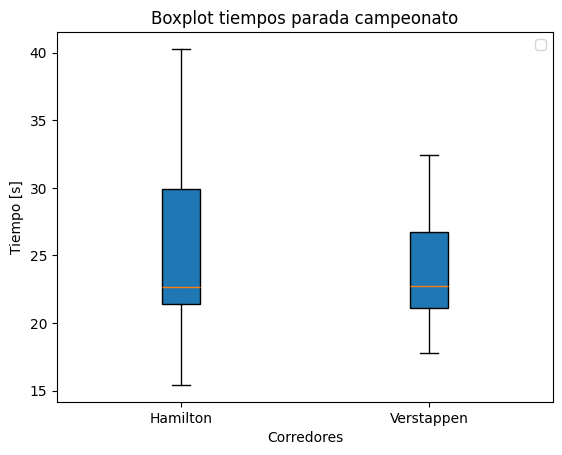

In [53]:
datos_corredor1.sample(10).transpose()
#millisecons es la columna que tiene el tiempo de parada en los pits.

pits_1 = datos_corredor1['milliseconds'] / 1000
pits_2 = datos_corredor2['milliseconds'] / 1000

bp = plt.boxplot([pits_1, pits_2], vert=True, patch_artist=True, labels=['Hamilton', 'Verstappen'], showfliers=False)

plt.title('Boxplot tiempos parada campeonato')
plt.xlabel('Corredores')
plt.ylabel('Tiempo [s]')
plt.legend()

plt.show()

Box plots de tiempos de vuelta en diferentes circuitos

Bahrain

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


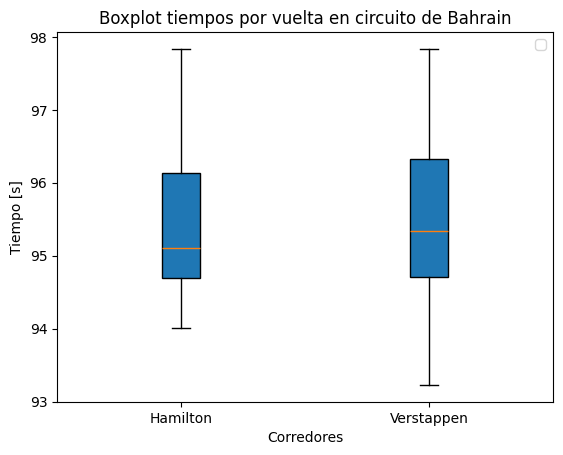

In [44]:
datos_carrera_BH = ds.loc[ds['Name'] == 'Bahrain']

Laptimes_BH_1 = datos_carrera_BH[datos_carrera_BH['driver_number']==44]
Laptimes_BH_1 = Laptimes_BH_1.drop_duplicates(subset=['position_lap','lap','driver_number','time_lap'])

Laptimes_BH_2 = datos_carrera_BH[datos_carrera_BH['driver_number']==33]
Laptimes_BH_2 = Laptimes_BH_2.drop_duplicates(subset=['position_lap','lap','driver_number','time_lap'])

plt.boxplot([Laptimes_BH_1['time_lap'],Laptimes_BH_2['time_lap']], vert=True, patch_artist=True, labels=['Hamilton', 'Verstappen'], showfliers=False)

plt.title('Boxplot tiempos por vuelta en circuito de Bahrain')
plt.xlabel('Corredores')
plt.ylabel('Tiempo [s]')
plt.legend()

In [52]:
lt1bh = Laptimes_BH_1[['lap','driver_number','position_lap','time_lap']]
lt2bh = Laptimes_BH_2 [['driver_number','position_lap','lap','time_lap']]

lista_1bh = [lt1bh, lt2bh]

# Inicializar un DataFrame vacío para almacenar el resultado de la fusión
merged_df = pd.DataFrame()

# Iterar sobre cada lista de DataFrames y fusionar los DataFrames
for dfs in [lista_1bh]:
    merged_df = pd.concat([merged_df, pd.merge(*dfs, on='lap', how='left')], axis=1)

print(merged_df)

    lap  driver_number_x  position_lap_x  time_lap_x  driver_number_y  position_lap_y  time_lap_y
0     1               44               2     119.538               33               1     118.245
1     2               44               2     142.712               33               1     142.406
2     3               44               2     156.656               33               1     158.001
3     4               44               2     104.932               33               1     104.343
4     5               44               2     105.139               33               1     104.629
5     6               44               2      96.169               33               1      95.982
6     7               44               2      96.123               33               1      95.902
7     8               44               2      96.075               33               1      96.032
8     9               44               2      96.148               33               1      96.012
9    10             

Tabla tiempos de vuelta de ambos corredores

Mexico

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


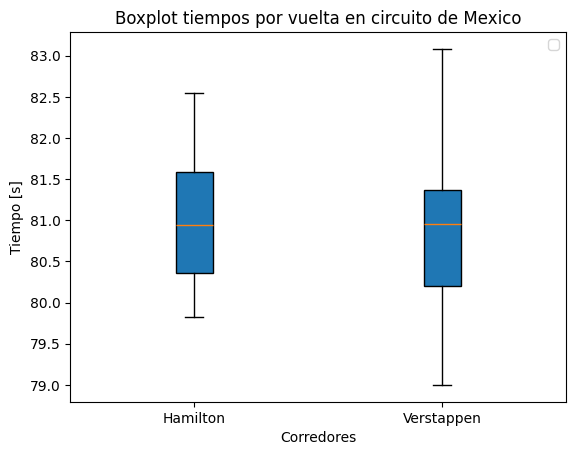

In [46]:
datos_carrera_MX = ds.loc[ds['Name'] == 'Mexico']

Laptimes_MX_1 = datos_carrera_MX[datos_carrera_MX['driver_number']==44]
Laptimes_MX_1 = Laptimes_MX_1.drop_duplicates(subset=['position_lap','lap','driver_number','time_lap'])

Laptimes_MX_2 = datos_carrera_MX[datos_carrera_MX['driver_number']==33]
Laptimes_MX_2 = Laptimes_MX_2.drop_duplicates(subset=['position_lap','lap','driver_number','time_lap'])

plt.boxplot([Laptimes_MX_1['time_lap'],Laptimes_MX_2['time_lap']], vert=True, patch_artist=True, labels=['Hamilton', 'Verstappen'], showfliers=False)

plt.title('Boxplot tiempos por vuelta en circuito de Mexico')
plt.xlabel('Corredores')
plt.ylabel('Tiempo [s]')
plt.legend()


In [ ]:
lt1mx = Laptimes_MX_1[['lap','driver_number','position_lap','time_lap']]
lt2mx = Laptimes_MX_2 [['driver_number','position_lap','lap','time_lap']]

lista_1mx = [lt1mx, lt2mx]

# Inicializar un DataFrame vacío para almacenar el resultado de la fusión
merged_df = pd.DataFrame()

# Iterar sobre cada lista de DataFrames y fusionar los DataFrames
for dfs in [lista_1mx]:
    merged_df = pd.concat([merged_df, pd.merge(*dfs, on='lap', how='left')], axis=1)

print(merged_df)

    lap  driver_number_x  position_lap_x  time_lap_x  driver_number_y  position_lap_y  time_lap_y
0     1               44               2     106.593               33               1     104.815
1     2               44               2     131.403               33               1     131.572
2     3               44               2     126.513               33               1     126.284
3     4               44               2     126.587               33               1     127.504
4     5               44               2      82.545               33               1      81.615
5     6               44               2      82.254               33               1      81.635
6     7               44               2      81.947               33               1      81.622
7     8               44               2      81.735               33               1      81.520
8     9               44               2      81.520               33               1      81.051
9    10             

Brasil

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


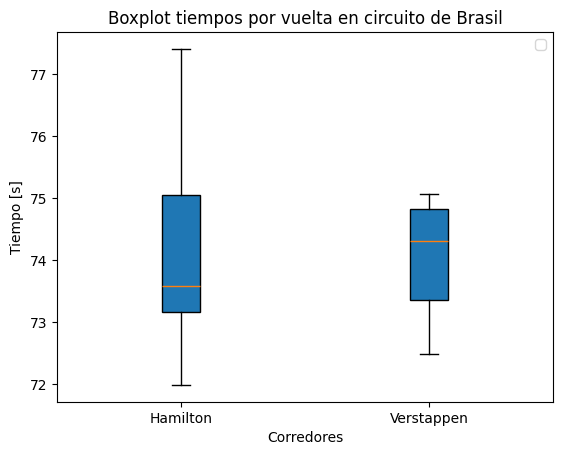

In [48]:
datos_carrera_BR = ds.loc[ds['Name'] =='Brazil']

Laptimes_BR_1 = datos_carrera_BR[datos_carrera_BR['driver_number']==44]
Laptimes_BR_1 = Laptimes_BR_1.drop_duplicates(subset=['position_lap','lap','driver_number','time_lap'])

Laptimes_BR_2 = datos_carrera_BR[datos_carrera_BR['driver_number']==33]
Laptimes_BR_2 = Laptimes_BR_2.drop_duplicates(subset=['position_lap','lap','driver_number','time_lap'])

plt.boxplot([Laptimes_BR_1['time_lap'],Laptimes_BR_2['time_lap']], vert=True, patch_artist=True, labels=['Hamilton', 'Verstappen'], showfliers=False)

plt.title('Boxplot tiempos por vuelta en circuito de Brasil')
plt.xlabel('Corredores')
plt.ylabel('Tiempo [s]')
plt.legend()

In [49]:
lt1BR= Laptimes_BR_1[['lap','driver_number','position_lap','time_lap']]
lt2BR = Laptimes_BR_2 [['driver_number','position_lap','lap','time_lap']]

lista_1BR = [lt1BR, lt2BR]

# Inicializar un DataFrame vacío para almacenar el resultado de la fusión
merged_df = pd.DataFrame()

# Iterar sobre cada lista de DataFrames y fusionar los DataFrames
for dfs in [lista_1BR]:
    merged_df = pd.concat([merged_df, pd.merge(*dfs, on='lap', how='left')], axis=1)

print(merged_df)

    lap  driver_number_x  position_lap_x  time_lap_x  driver_number_y  position_lap_y  time_lap_y
0     1               44               6      83.099               33               1      78.399
1     2               44               6      75.675               33               1      74.680
2     3               44               4      74.254               33               1      74.471
3     4               44               4      74.307               33               1      74.713
4     5               44               3      74.172               33               1      74.660
5     6               44               3      87.601               33               1      87.488
6     7               44               3     119.617               33               1     119.850
7     8               44               3     131.737               33               1     133.610
8     9               44               3     147.627               33               1     149.633
9    10             

Abu Dhabi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


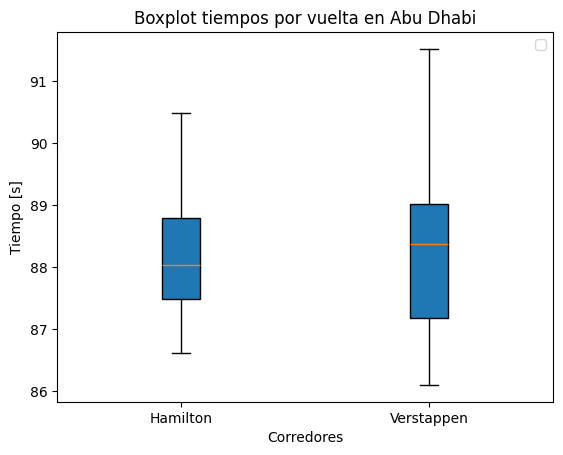

In [50]:
datos_carrera_AD = ds.loc[ds['Name'] =='Abu Dhabi']

Laptimes_AD_1 = datos_carrera_AD[datos_carrera_AD['driver_number']==44]
Laptimes_AD_1 = Laptimes_AD_1.drop_duplicates(subset=['position_lap','lap','driver_number','time_lap'])

Laptimes_AD_2 = datos_carrera_AD[datos_carrera_AD['driver_number']==33]
Laptimes_AD_2 = Laptimes_AD_2.drop_duplicates(subset=['position_lap','lap','driver_number','time_lap'])

plt.boxplot([Laptimes_AD_1['time_lap'],Laptimes_AD_2['time_lap']], vert=True, patch_artist=True, labels=['Hamilton', 'Verstappen'], showfliers=False)

plt.title('Boxplot tiempos por vuelta en Abu Dhabi')
plt.xlabel('Corredores')
plt.ylabel('Tiempo [s]')
plt.legend()

In [51]:
lt1AD= Laptimes_AD_1[['lap','driver_number','position_lap','time_lap']]
lt2AD = Laptimes_AD_2 [['driver_number','position_lap','lap','time_lap']]

lista_1AD = [lt1AD, lt2AD]

# Inicializar un DataFrame vacío para almacenar el resultado de la fusión
merged_df = pd.DataFrame()

# Iterar sobre cada lista de DataFrames y fusionar los DataFrames
for dfs in [lista_1AD]:
    merged_df = pd.concat([merged_df, pd.merge(*dfs, on='lap', how='left')], axis=1)

print(merged_df)

    lap  driver_number_x  position_lap_x  time_lap_x  driver_number_y  position_lap_y  time_lap_y
0     1               44               1      91.686               33               2      92.800
1     2               44               1      88.791               33               2      89.103
2     3               44               1      88.587               33               2      88.827
3     4               44               1      88.789               33               2      89.026
4     5               44               1      88.630               33               2      88.718
5     6               44               1      88.593               33               2      88.707
6     7               44               1      88.550               33               2      88.636
7     8               44               1      88.585               33               2      88.817
8     9               44               1      88.356               33               2      88.671
9    10             